In [ ]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Pullover", "Coat", "Shirt"])

test_Y

4423680/4422102 [==============================] - 0s 0us/step


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    if arr[0] == 2:
        arr[:] = 1
    
    elif arr[0] ==4:
        arr[:] = 2

    elif arr[0] == 6:
        arr[:] = 3

    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    if arr[0] == 2:
        arr[:] = 1

    elif arr[0] ==4:
        arr[:] = 2

    elif arr[0] == 6:
        arr[:] = 3

    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

train_Y.shape, test_Y.shape

((24000,), (4000,))

In [ ]:
# test_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정.
for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    elif idx == 2:
        test_img2 = img
    else:
        test_img3 = img
print(test_img0.shape, test_img1.shape, test_img2.shape, test_img3.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    elif idx == 2:
        train_img2 = img
    else:
        train_img3 = img
print(train_img0.shape, train_img1.shape, train_img2.shape,train_img3.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [ ]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_img0 = np.vstack((test_img0, test_img2))
test_X = np.vstack((test_img0, test_img3))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_img0 = np.vstack((train_img0, train_img2))
train_X = np.vstack((train_img0, train_img3))

print(train_X.shape, test_X.shape)

(24000, 28, 28) (4000, 28, 28)


In [ ]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((24000, 28, 28), (4000, 28, 28), (24000,), (4000,))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

In [ ]:
augment_size =8000

#원본 이지미 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()

#이미지를 변형할 원본 이미지를 찾기 위한 함수 예제(중복허용 0/중복허용 x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))

[18136  6114 15359   417  7005 18521 19630 13405 22191  7416 17693   575 21521  6105  8819  6957 22560 12792 17175  3679 16672  3545  6623 14987  4821  4514 23826 20010  9029  6663 11795 10143 22808 18505  4368  6156  4337 19710  2503 11221 11120  7792  5392  2522 21666  1692 19345 16831 18747  7773  1619  6494 21660  6305  4001  3303 21474  9906  1202 15255  8875  2285 12046 19233 23358  8805  8154 18389 20490  8484  6756  8738 20271  2668  7320  7162 18151  6231 23066  2148  2131 11438   588 14190  2127 13735 14244 21554  3350  9452 23227 19032 12292 21793  5230  2170   928 14418 17921  1688 22023  5663 15725 18638  5740 10905 23910 14387 23939 12816 12179  7033  1904  1774 11179 16667  1330 10446  2021 10732 15345  4011 21023  2611 19868  4194  6562 23214  7789 22196  7448  2943 10460  8152 15077 11784 11952 10721 21844   981 19438  2706   108  7760  1371  8834 20406  4880   201 15583 21137 15350 12622   166 11866 11334 11340 17856 23845 18627 13474  7202 13657 17609  4468 12753  48

In [ ]:
#보강 이미지 데이터 생성 
x_augmented = image_generator.flow(x = x_augmented, y = np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]

In [ ]:
x_augmented_1 = image_generator.flow(x = x_augmented, 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,  
                                 shuffle = False).next()[1]   

print(x_augmented.shape)
print(x_augmented_1.shape)

(8000, 28, 28, 1)
(8000,)


In [ ]:
#데이터 합쳐주기 
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))

#보강 데이터 결합 확인
print(train_X.shape)

(32000, 28, 28, 1)


In [ ]:
#shuffle 해주기
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y)
test_X, test_Y = shuffle(test_X, test_Y)

In [ ]:
print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(24000, 28, 28) (4000, 28, 28)
(24000, 28, 28, 1) (4000, 28, 28, 1)


In [ ]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [ ]:
model= tf.keras.Sequential([
tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,
padding='same',activation='relu'),
tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,
padding='same',activation='relu'),
tf.keras.layers.MaxPool2D(strides = (2,2)),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
tf.keras.layers.MaxPool2D(strides = (2,2)),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=512, activation = 'relu'),
tf.keras.layers.Dropout(rate = 0.5),
tf.keras.layers.Dense(units=256, activation = 'relu'),
tf.keras.layers.Dropout(rate = 0.5),
tf.keras.layers.Dense(units=4, activation = 'softmax')
])




In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [ ]:
history = model.fit(train_X,train_Y,
epochs = 500,
validation_split = 0.25,
callbacks = [tf.keras.callbacks.EarlyStopping
(patience=5,monitor='val_loss')])


Epoch 1/500
563/563 [==============================] - 4s 8ms/step - loss: 0.8220 - accuracy: 0.6460 - val_loss: 0.4924 - val_accuracy: 0.7973
Epoch 2/500
563/563 [==============================] - 4s 7ms/step - loss: 0.5706 - accuracy: 0.7737 - val_loss: 0.4442 - val_accuracy: 0.8153
Epoch 3/500
563/563 [==============================] - 4s 7ms/step - loss: 0.5111 - accuracy: 0.7958 - val_loss: 0.3946 - val_accuracy: 0.8403
Epoch 4/500
563/563 [==============================] - 4s 7ms/step - loss: 0.4670 - accuracy: 0.8157 - val_loss: 0.3923 - val_accuracy: 0.8417
Epoch 5/500
563/563 [==============================] - 4s 7ms/step - loss: 0.4504 - accuracy: 0.8255 - val_loss: 0.3535 - val_accuracy: 0.8583
Epoch 6/500
563/563 [==============================] - 4s 7ms/step - loss: 0.4347 - accuracy: 0.8297 - val_loss: 0.3471 - val_accuracy: 0.8640
Epoch 7/500
563/563 [==============================] - 4s 7ms/step - loss: 0.4161 - accuracy: 0.8381 - val_loss: 0.3439 - val_accuracy: 0.8640

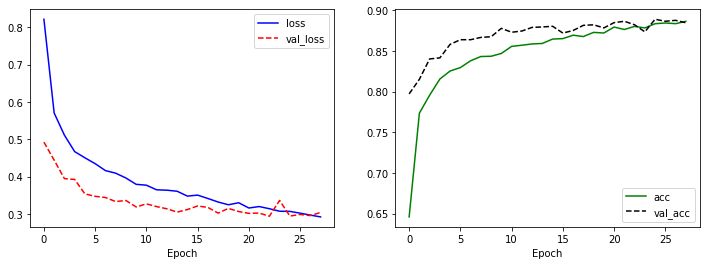

In [ ]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X,test_Y)


125/125 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8727


[0.33015844225883484, 0.8727499842643738]

(550, 550, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


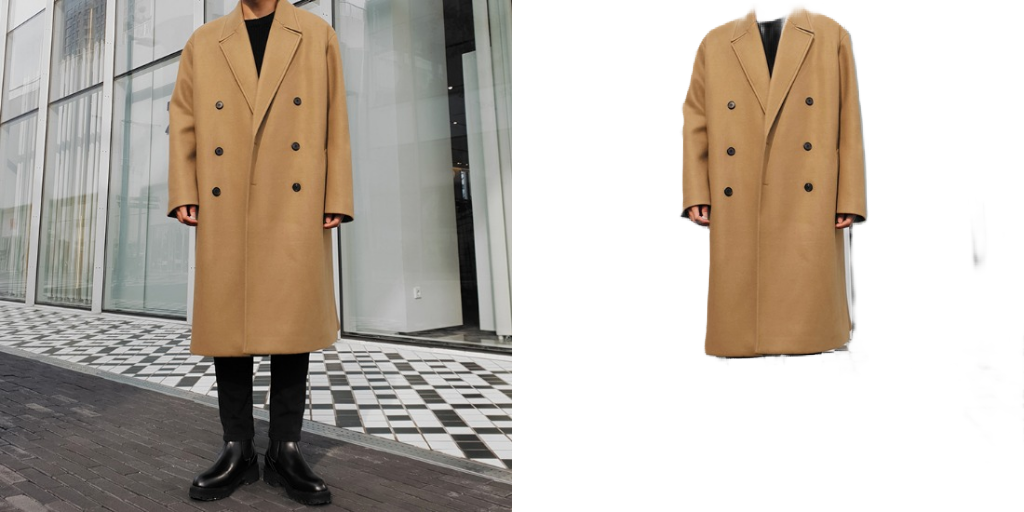

In [ ]:
#기존 우리의 openCV를 통해 의류를 분류해 내기

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/test_1/test_6.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/fAIshion_P/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

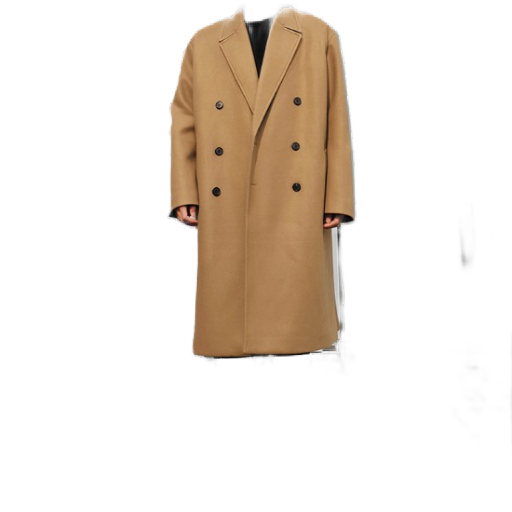

In [ ]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 150   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 158 153  37  12 160 155 162   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 159 158 162  27 164 147 159 157   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 114 159 116 162 167 159 159 158 151   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 123 159 152 155 158 145 157 153 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 129 116 158 153 126 153 150 140 149 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 156 141 154 150 148  55 144 155 147 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 146 126 152 152 136 147 143 159 144 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 143  60 150 147 138 147 139 152 138 150   

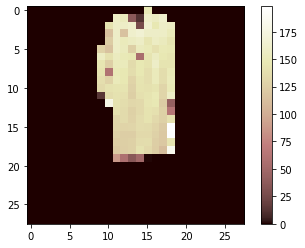

(1, 28, 28)

In [ ]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [ ]:
test_X.shape
input_image = input_image.reshape(1,28,28,1)

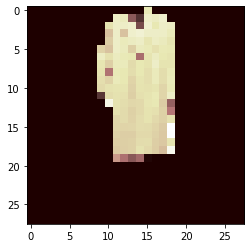

[[1.4225214 1.1820935 1.1627734 1.2326117]]


In [ ]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(input_predict)

In [ ]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

0